<a href="https://colab.research.google.com/github/sharulms/d30-entry-/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

Loading and Preprocessing
Load the Iris dataset from sklearn.
Drop the species column since this is a clustering problem.

In [3]:
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows of the DataFrame
print("Original DataFrame:")
print(df.head())

# Since clustering does not require the species column, we skip it
# In the context of clustering, we do not have labels, so we only use features
# The species information can be accessed through iris.target, but it's not used here

# Display the shape of the DataFrame after dropping the species column
print("\nShape of DataFrame after dropping species column:", df.shape)


Original DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Shape of DataFrame after dropping species column: (150, 4)


Clustering Algorithm Implementation
Implement the following two clustering algorithms:

K-Means Clustering

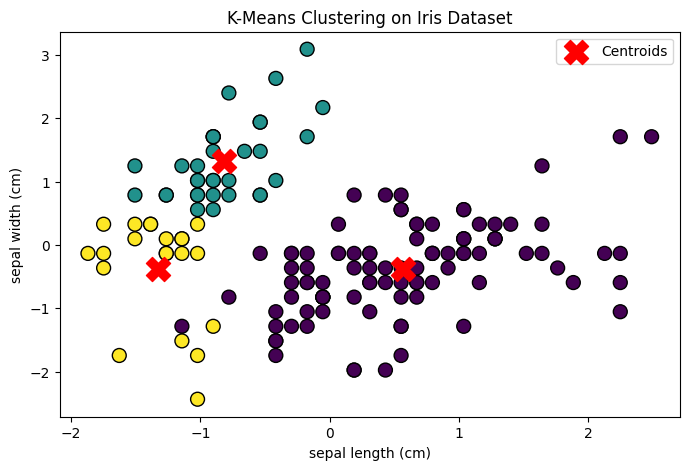

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Preprocessing: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-Means Clustering
optimal_k = 3  # Assuming we know there are 3 species
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()


 Hierarchical Clustering

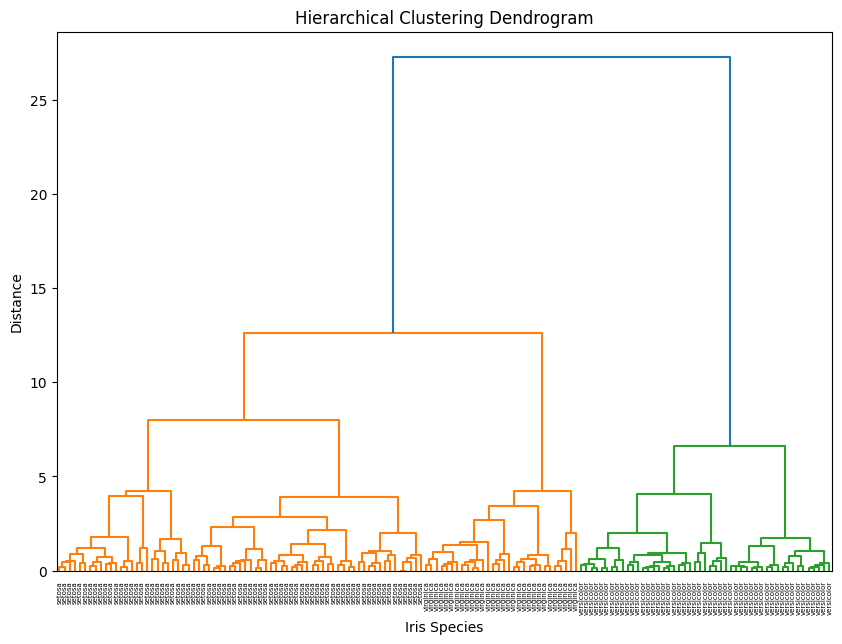

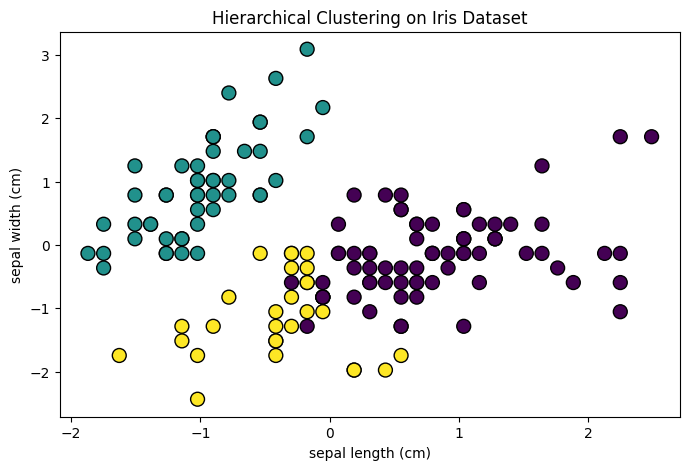

In [5]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_k)
labels_hierarchical = hierarchical_clustering.fit_predict(X_scaled)

# Generate a dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=iris.target_names[hierarchical_clustering.labels_], distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Iris Species')
plt.ylabel('Distance')
plt.show()

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_hierarchical, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
